# Импорт

In [29]:
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
from random import shuffle
sys.path.append("../Project")
from Classes.Ant import Ant
from Classes.TrackOfWalk import TrackOfWalk

# Общие переменные

In [30]:
field_size = list(range(10, 200, 10))

In [31]:
feromon_maps = []
for i in field_size:
    feromon_map = np.random.rand(i, i)
    feromon_map = (feromon_map + feromon_map.T) / 2 
    np.fill_diagonal(feromon_map, -np.inf)
    feromon_maps.append(feromon_map)
distance_maps = []
for i in field_size:
    distance_map = np.random.rand(i, i)
    distance_map = (distance_map + distance_map.T) / 2 
    np.fill_diagonal(distance_map, -np.inf)
    distance_maps.append(distance_map)

In [32]:
def experement(ant: Ant,
               pos: iter,
               feromon_map_updater: TrackOfWalk, 
               feromon_map: np.ndarray, 
               distance_map: np.ndarray):
    track = ant.walk(pos=pos, 
                     distance_matrix=distance_map, 
                     feromon_matrix=feromon_map)
    feromon_map = feromon_map_updater.update(track=track, 
                                                feromon_matrix=feromon_map)
    return feromon_map

In [33]:
def Dijkstra(N, S, matrix):
	valid = [True]*N        
	weight = [np.inf]*N
	weight[S] = 0
	way = []
	for i in range(N):
		min_weight = np.inf
		ID_min_weight = -1
		for j in range(N):
			if valid[j] and weight[j] < min_weight:
				min_weight = weight[j]
				ID_min_weight = j
		for z in range(N):
			if weight[ID_min_weight] + matrix[ID_min_weight][z] < weight[z]:
				weight[z] = weight[ID_min_weight] + matrix[ID_min_weight][z]
		valid[ID_min_weight] = False
		way.append(ID_min_weight)
	return weight, way

In [43]:
def experement_ants(ants, positions, feromon_map_updater, num_of_iterations, feromon_map, distance_map):
    fm = np.array(feromon_map, copy=True)
    for _ in range(num_of_iterations):
        for ant, pos in zip(ants, positions):
            fm = experement(ant=ant, 
                            pos=pos, 
                            feromon_map_updater=feromon_map_updater, 
                            feromon_map=fm, 
                            distance_map=distance_map)
    way = Dijkstra(feromon_map.shape[0], 1, fm*(-1))[1]
    # print(way)
    return [distance_map[i[0], i[1]] for i in np.array(list(zip(way[:-2], way[1:])))], way, fm

In [35]:
import time


In [49]:
res = []
for feromon_map, distance_map, fs in zip(feromon_maps, distance_maps, field_size):
    # print(fs)
    start_time = time.time()
    ants = [Ant(walk_distance=fs+1, a=1, b=1) for _ in range(0, max(fs//4, 1))]
    feromon_map_updater = TrackOfWalk(feromon_volume=fs*10, feromon_erosion_speed=1-0.001)
    positions = [[i, i] for i in range(0, fs, 1)]
    # print(len(positions), feromon_map.shape)
    shuffle(positions)
    experement_ants(ants=ants, positions=positions, feromon_map_updater=feromon_map_updater, num_of_iterations=5, feromon_map=feromon_map, distance_map=distance_map)
    res.append(time.time() - start_time)

In [37]:
h_mark = []
h_mean = []
h_max = []
w_mark = []
w_mean = []
w_max = []
for i in distance_map:
    w_mark.append(i[i != -np.inf].min())
    w_mean.append(i[i != -np.inf].mean())
    h_max.append(i[i != -np.inf].max())
for i in distance_map:
    h_mark.append(i[i != -np.inf].min())
    h_mean.append(i[i != -np.inf].mean())
    w_max.append(i[i != -np.inf].max())

sum(h_mark), sum(w_mark), sum(h_mean), sum(w_mean), sum(h_max), sum(w_max)

(8.666843666928429,
 8.666843666928429,
 95.4164094132835,
 95.4164094132835,
 181.66994599898166,
 181.66994599898166)

In [51]:
len(res), len(field_size)

(19, 19)

In [50]:
np.array(res)[:len(field_size)]

array([9.75894928e-03, 3.57639790e-02, 1.10238791e-01, 1.96803331e-01,
       3.81125689e-01, 6.38253927e-01, 9.13018942e-01, 1.38543153e+00,
       1.89801455e+00, 2.72241735e+00, 3.50784349e+00, 4.64946580e+00,
       5.89876771e+00, 7.41538000e+00, 9.01058483e+00, 1.10483932e+01,
       1.30972178e+01, 1.56814799e+01, 1.82099607e+01])

<Axes: xlabel='field_size', ylabel='res'>

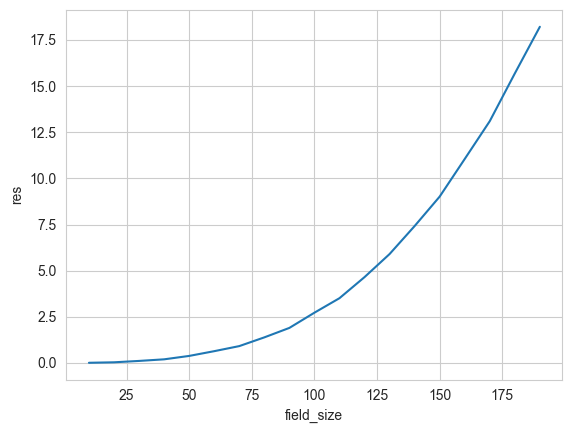

In [52]:
sns.set_style("whitegrid")
sns.lineplot(data={'field_size': np.array(field_size), 'res': np.array(res)}, x="field_size", y="res")
# sns.lineplot(data={'count': list(range(25, 100, 5)), 'res': [sum(h_mean) for i in res]}, x="count", y="res")

In [ ]:
way = Dijkstra(100, 1, feromon_map*(-1))[1]
ways = np.array(list(zip(way[:-2], way[1:])))

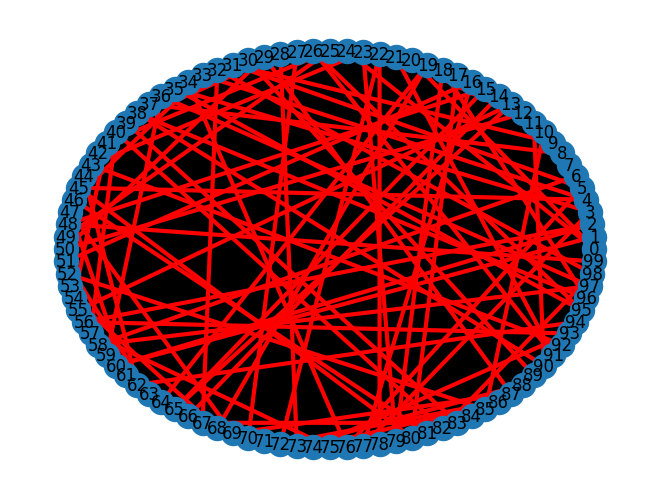

In [ ]:
K1 = nx.Graph()

for start, end, length in edges:
    K1.add_edge(start, end, length=length)

nx.draw_circular(K1, with_labels = True)
nx.draw_networkx_edges(K1, nx.circular_layout(K1), edgelist=ways, edge_color='r', arrows=True, width=3)

In [ ]:
distance = []
for i in ways:
    distance.append(distance_map[i[0], i[1]])
sum(distance)

47.50088771225763

In [ ]:
h_mark = []
h_mean = []
h_max = []
w_mark = []
w_mean = []
w_max = []
for i in distance_map:
    w_mark.append(i[i != -np.inf].min())
    w_mean.append(i[i != -np.inf].mean())
    h_max.append(i[i != -np.inf].max())
for i in distance_map:
    h_mark.append(i[i != -np.inf].min())
    h_mean.append(i[i != -np.inf].mean())
    w_max.append(i[i != -np.inf].max())

sum(h_mark), sum(w_mark), sum(h_mean), sum(w_mean), sum(h_max), sum(w_max)

(6.615498189895459,
 6.615498189895459,
 50.28068822869916,
 50.28068822869916,
 94.1655981442547,
 94.1655981442547)